In [1]:
# Load libraries
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as metric
from sklearn.model_selection import validation_curve
from sklearn.metrics import make_scorer


# Halving Grid Search

## Load Data

Iris again.

In [2]:
from sklearn.datasets import load_iris;
iris = load_iris();
dat = iris.data;
target = iris.target;

In [3]:
perc_values = [0.85, 0.15];
X_train, X_test, y_train, y_test = train_test_split(dat, target, test_size = perc_values[1], random_state=1);

## Exhaustive Grid Search

We have already covered how to do an exhaustive grid search. Let's do it using cross-validation for SVM models.

In [4]:
from sklearn.svm import SVC as model_constructor

In [5]:
from sklearn.model_selection import GridSearchCV

In [7]:
# SVM
C_values = [1e-03, 1, 1e03];
gamma_values = [1e-03, 1, 1e03];

params_grid = {'C': C_values,
               'gamma': gamma_values} 

In [8]:
# Define grid
grid_cv = GridSearchCV(model_constructor(),
                     param_grid=params_grid,
                     n_jobs=2, ## Paralellization!
                     cv = 5) # Number of folds
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.001, 1, 1000.0], 'gamma': [0.001, 1, 1000.0]})

In [12]:
grid_cv.cv_results_

{'mean_fit_time': array([2.31504440e-03, 6.00767136e-04, 9.95874405e-04, 6.01339340e-04,
        3.98921967e-04, 1.00603104e-03, 2.17914581e-05, 6.00051880e-04,
        1.20005608e-03]),
 'std_fit_time': array([1.77599961e-03, 4.90551158e-04, 5.06211549e-06, 4.90998006e-04,
        4.88584357e-04, 1.10113254e-05, 4.35829163e-05, 4.89940316e-04,
        4.00018706e-04]),
 'mean_score_time': array([0.00020127, 0.00040193, 0.00039997, 0.00039997, 0.00020137,
        0.00062089, 0.00020523, 0.00039997, 0.        ]),
 'std_score_time': array([0.00040255, 0.00049227, 0.00048986, 0.00048986, 0.00040274,
        0.00050834, 0.00041046, 0.00048986, 0.        ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.001, 1, 1, 1, 1000.0, 1000.0, 1000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 1, 1000.0, 0.001, 1, 1000.0, 0.001, 1, 1000.0],
      

In [9]:
print('Values validated for C hyperparameter: ' + str(grid_cv.cv_results_['param_C']))
print('Values validated for gamma hyperparameter: ' + str(grid_cv.cv_results_['param_gamma']))
print('Validation accuracy: ' + str(grid_cv.cv_results_['mean_test_score']))
print('Best score ' + str(grid_cv.best_score_))
print('Best params: ' + str(grid_cv.best_params_))

Values validated for C hyperparameter: [0.001 0.001 0.001 1 1 1 1000.0 1000.0 1000.0]
Values validated for gamma hyperparameter: [0.001 1 1000.0 0.001 1 1000.0 0.001 1 1000.0]
Validation accuracy: [0.36246154 0.36246154 0.36246154 0.69292308 0.96030769 0.36246154
 0.976      0.94430769 0.36246154]
Best score 0.976
Best params: {'C': 1000.0, 'gamma': 0.001}


## Halving Grid Search

Scikit-learn also provides the *HalvingGridSearchCV* and *HalvingRandomSearchCV* estimators that can be used to search a parameter space using **successive halving**. Successive halving, SH, is like a tournament among candidate parameter combinations. SH is an iterative selection process where all hyperparameter combinations are evaluated with a small amount of resources at the first iteration. For parameter tuning, the resource is typically the number of training samples. Only some of these candidates, the ones with better performance over cross-validation, are selected for the next iteration, which will be allocated more resources (more data). 

As illustrated in the figure below, only a subset of candidates ‘survive’ until the last iteration. These are the candidates that have consistently ranked among the top-scoring candidates across all iterations. Each iteration is allocated an increasing amount of resources per candidate, normally the number of samples.

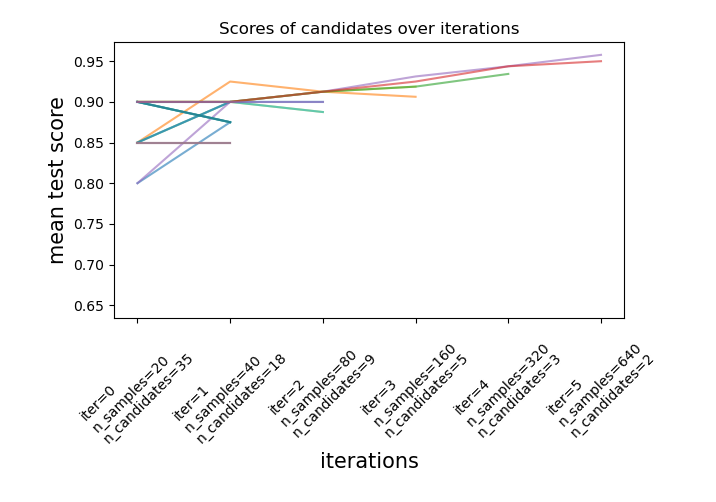


The *factor* parameter controls the rate at which the resources grow as well the rate at which the number of candidates decreases. In each iteration, the number of resources per candidate is multiplied by *factor* and the number of candidates is divided by the same *factor*. Along with resource and min_resources, factor is the most important parameter to control the grid search. By default, a factor value of 3 will be used.

Implementing the Random Grid Search method using scikit-learn is very easy, as it is available from the *RandomizedSearchCV* function.

In [10]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
?HalvingGridSearchCV

The parametro *n_iter* tells the function how many values, randomly selected within the defined limits, we want to try.

In [11]:
grid_results_cv = HalvingGridSearchCV(model_constructor(), 
                                     params_grid,
                                     factor = 2,
                                     resource = 'n_samples',
                                     min_resources  = 'exhaust',
                                     cv = 5,                                      
                                     n_jobs = 2, 
                                     random_state = 0)
grid_results_cv.fit(X_train, y_train)


HalvingGridSearchCV(estimator=SVC(), factor=2, n_jobs=2,
                    param_grid={'C': [0.001, 1, 1000.0],
                                'gamma': [0.001, 1, 1000.0]},
                    random_state=0,
                    refit=<function _refit_callable at 0x00000262CABC2DC0>)

In [12]:
print('Values validated for C hyperparameter: ' + str(grid_results_cv.cv_results_['param_C']))
print('Values validated for gamma hyperparameter: ' + str(grid_results_cv.cv_results_['param_gamma']))
print('Validation accuracy: ' + str(grid_results_cv.cv_results_['mean_test_score']))
print('Best score ' + str(grid_results_cv.best_score_))
print('Best params: ' + str(grid_results_cv.best_params_))

Values validated for C hyperparameter: [0.001 0.001 0.001 1 1 1 1000.0 1000.0 1000.0 1 1000.0 1000.0 1000.0 1
 1000.0 1000.0 1]
Values validated for gamma hyperparameter: [0.001 1 1000.0 0.001 1 1000.0 0.001 1 1000.0 1000.0 1000.0 0.001 1 1 1
 0.001 1]
Validation accuracy: [0.43333333 0.43333333 0.43333333 0.43333333 0.92       0.43333333
 0.88       0.88       0.43333333 0.31363636 0.31363636 0.96363636
 0.94545455 0.98181818 0.9307971  0.97391304 0.95688406]
Best score 0.9739130434782608
Best params: {'C': 1000.0, 'gamma': 0.001}


In [13]:
# Initial iteration
print('Values validated for C hyperparameter: ' + str(grid_results_cv.cv_results_['param_C'][0:9]))
print('Values validated for gamma hyperparameter: ' + str(grid_results_cv.cv_results_['param_gamma'][0:9]))
print('Validation accuracy: ' + str(grid_results_cv.cv_results_['mean_test_score'][0:9]))

Values validated for C hyperparameter: [0.001 0.001 0.001 1 1 1 1000.0 1000.0 1000.0]
Values validated for gamma hyperparameter: [0.001 1 1000.0 0.001 1 1000.0 0.001 1 1000.0]
Validation accuracy: [0.43333333 0.43333333 0.43333333 0.43333333 0.92       0.43333333
 0.88       0.88       0.43333333]


In [32]:
# Second iteration
print('Values validated for C hyperparameter: ' + str(grid_results_cv.cv_results_['param_C'][9:14][::-1]))
print('Values validated for gamma hyperparameter: ' + str(grid_results_cv.cv_results_['param_gamma'][9:14][::-1]))
print('Validation accuracy: ' + str(grid_results_cv.cv_results_['mean_test_score'][9:14][::-1]))

Values validated for C hyperparameter: [1 1000.0 1000.0 1000.0 1]
Values validated for gamma hyperparameter: [1 1 0.001 1000.0 1000.0]
Validation accuracy: [0.98181818 0.94545455 0.96363636 0.31363636 0.31363636]


In [34]:
# Third iteration
print('Values validated for C hyperparameter: ' + str(grid_results_cv.cv_results_['param_C'][14:17][::-1]))
print('Values validated for gamma hyperparameter: ' + str(grid_results_cv.cv_results_['param_gamma'][14:17][::-1]))
print('Validation accuracy: ' + str(grid_results_cv.cv_results_['mean_test_score'][14:17][::-1]))

Values validated for C hyperparameter: [1 1000.0 1000.0]
Values validated for gamma hyperparameter: [1 0.001 1]
Validation accuracy: [0.95688406 0.97391304 0.9307971 ]
